In [3]:
#sklearn
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os,time

In [5]:
systempath = "C:\\Users\\Singh Vivek\\Downloads\\5. Practice\\Titanic"

In [6]:
os.chdir(systempath)
os.getcwd()

'C:\\Users\\Singh Vivek\\Downloads\\5. Practice\\Titanic'

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
print('The shape of the Train is {} rows & {} columns' .format(train.shape[0],train.shape[1]))
print('The shape of the Test is {} rows & {} columns' .format(test.shape[0],test.shape[1]))

The shape of the Train is 891 rows & 12 columns
The shape of the Test is 418 rows & 11 columns


In [9]:
print(train.columns)
print(train.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
100*pd.crosstab(train.Parch,train.Survived)/train.shape[0]

Survived,0,1
Parch,,
0,49.943883,26.150393
1,5.948373,7.295174
2,4.489338,4.489338
3,0.224467,0.336700
4,0.448934,0.000000
5,0.448934,0.112233
6,0.112233,0.000000


In [17]:
(100*train.Age.isnull().sum() / train.shape[0])

19.865319865319865

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train.isnull().sum() # Age,Cabin and Embarked have null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
## Logistic regression

In [22]:
from sklearn import linear_model
from sklearn import preprocessing

In [23]:
#label encoder

In [24]:
train[['Pclass']] = train.Pclass.astype(object)

In [25]:
le = preprocessing.LabelEncoder()

In [26]:
train[['Pclass','Sex','Embarked']].describe()

,Pclass,Sex,Embarked
count,891,891,889
unique,3,2,3
top,3,male,S
freq,491,577,644


In [27]:
train = pd.get_dummies(train, columns=['Pclass','Sex','Embarked'], prefix=["Class", "Sex","Embarked"])


In [28]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Class_1', 'Class_2', 'Class_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [29]:
x_train = train[['Class_1','Class_2','Sex_female','SibSp','Parch','Embarked_C','Embarked_Q']]
y_train = train.Survived

In [30]:
logreg = linear_model.LogisticRegression(C=1e5)

In [31]:
logreg.fit(X=x_train,y=y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [32]:
test = pd.get_dummies(test, columns=['Pclass','Sex','Embarked'], prefix=["Class", "Sex","Embarked"])
x_test = test[['Class_1','Class_2','Sex_female','SibSp','Parch','Embarked_C','Embarked_Q']]

In [33]:
predicted = logreg.predict(x_test)
predicted_train = logreg.predict(x_train)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
print(classification_report(train.Survived,predicted_train))

             precision    recall  f1-score   support

          0       0.82      0.85      0.84       549
          1       0.75      0.70      0.72       342

avg / total       0.79      0.79      0.79       891



In [36]:
print(confusion_matrix(train.Survived,predicted_train))

[[467  82]
 [102 240]]


In [37]:
accuracy_score(train.Survived,predicted_train)

0.79349046015712688

In [38]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ]

In [39]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    predicted = alg.fit(x_train, y_train).predict(x_train)
    fp, tp, th = roc_curve(y_train, predicted)
    #roc_auc_rf = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    #MLA_compare.loc[row_index, 'Square root mean error'] = sqrt(mean_squared_error(y_test,predicted))
    MLA_compare.loc[row_index, 'MLA Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_train, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_train, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Accuracy'], ascending = False, inplace = True)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anac

In [40]:
MLA_compare.sort_values(by = 'MLA Name',ascending = True,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anac

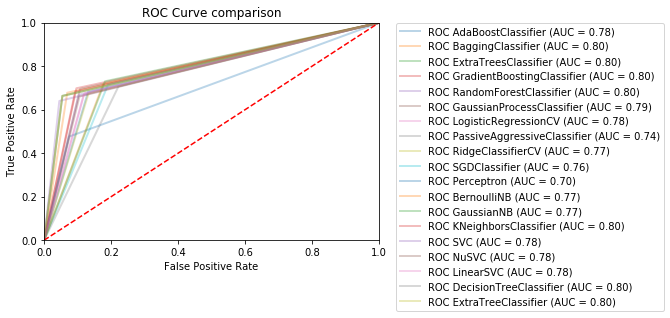

In [41]:
index = 1
for alg in MLA:
    predicted = alg.fit(x_train, y_train).predict(x_train)
    fp, tp, th = roc_curve(y_train, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [43]:
MLA_compare.sort_values('MLA Accuracy',ascending=False)

,MLA Name,MLA Accuracy,MLA Precission,MLA Recall,MLA AUC
17,DecisionTreeClassifier,0.8373,0.883268,0.663743,0.804549
18,ExtraTreeClassifier,0.8373,0.883268,0.663743,0.804549
2,ExtraTreesClassifier,0.8373,0.883268,0.663743,0.804549
4,RandomForestClassifier,0.8350,0.828283,0.719298,0.813201
1,BaggingClassifier,0.8328,0.872587,0.660819,0.800355
3,GradientBoostingClassifier,0.8249,0.818493,0.698830,0.801146
13,KNeighborsClassifier,0.8215,0.821053,0.684211,0.795657
5,GaussianProcessClassifier,0.8171,0.801347,0.695906,0.794219
14,SVC,0.8092,0.800699,0.669591,0.782883
15,NuSVC,0.8047,0.795775,0.660819,0.777586
